*Machine Learning Project*

Twenty years from now, i was working in a school and for the first time i started to deal with larger size of data, student scores, all subjects, all years, all kind of examination. I then had a bet with boss, I believed that if we have enough data, we can (at least roughly) predict the performance of students. I could today build a model to learn from students performance in a school for the past 4 years, counting the basic subjects into consideration, and add to them the performance of the first 2 terms of the current year, the model could predict at ~80 percent accuracy the total average of the current year. I was thrilled to see this happening, I used the linear regression model, and as i'm going forward, i'll use more models to reach a better result.
The outcome of this simple model is huge, as it might alert the schools by the beginning of Term3 that this student may faile, and so the right remedial plan and action can be done.

Assuming Y1 is last year, and Y2 is the year before then Y3 and Y4<br>
Y1 Y2  Y3  Y4  Total averages in the past 4 years<br>
<br>
E1 M1 S1<br>
E2 M2 S2<br>
E3 M3 S3<br>
E4 M4 S4<br>
English, math and science in the past 4 years (year average)<br>
<br>
ET1 MT1 ST1 EMS avgs current year term1<br>
ET2 MT2 ST2 EMS avgs current year term1<br>

Assuming that the learning process is linear, then we can count on the following formula to predict the current  year average
Predicted Average = a0 + a1*x1 + a2*x2 ....an*xn
the goal is to find a0, a1.... an which fits this formula and after applying it on the sample data, it gives a low error margin
the best i could get so far is ~80%

The next step is to change the predictor to a categorical one, so that we can predict wheather a student will pass or fail

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [66]:
grades = pd.read_csv('allGrades.csv').dropna()
#grades = pd.read_csv('allGrades2.csv').dropna()

In [67]:
theClass = 8
#Choose which scores to learn from 
inputs = ['Y1','Y2','Y3','Y4','E1','M1','S1','E2','M2','S2','E3','M3','S3','E4','M4','S4','ET1','MT1','ST1','ET2','MT2','ST2']
#inputs = ['Y1','Y2','Y3','E1','M1','S1','E2','M2','S2','E3','M3','S3','ET1','MT1','ST1','ET2','MT2','ST2']
#inputs = ['E1','M1','S1','E2','M2','S2','E3','M3','S3','E4','M4','S4','ET1','MT1','ST1','ET2','MT2','ST2']
#inputs = ['E1','M1','S1','E2','M2','S2','E3','M3','S3','E4','M4','S4','ET1','MT1','ST1','ET2','MT2','ST2']
#inputs = ['E1','M1','S1','ET1','MT1','ST1','ET2','MT2','ST2']

#grades = grades[grades['Class'] == theClass]
grades = grades[grades['YearAVG'] < 60]
y= grades['YearAVG'].values
X= grades[inputs].values
grades.head()


,Class,SKey,AY,YearAVG,Y1,Y2,Y3,Y4,E1,M1,...,S3,E4,M4,S4,ET1,MT1,ST1,ET2,MT2,ST2
163,7,5361,1314,59.420434,59.486705,66.935739,69.568243,74.124943,67.399942,58.883857,...,73.9270,85.264232,58.699200,66.8885,68.072758,77.000000,63.47,72.096896,56.768,71.48
378,8,3899,1011,59.990587,60.627287,62.607915,61.719625,55.536155,61.580393,64.495800,...,56.6625,56.889005,54.951110,65.3775,63.360000,62.700000,65.85,61.915515,38.150,55.50
461,6,5025,1213,59.783758,70.639498,75.876754,70.899093,44.830690,64.926482,77.835000,...,66.0865,53.409005,46.450000,53.0425,62.387586,32.600000,64.75,68.345357,55.160,51.75
520,7,4840,1112,59.365225,70.200323,55.341604,61.531045,73.835085,79.762189,73.534071,...,65.5425,71.054770,84.590000,77.7650,76.054482,90.140000,68.90,54.403793,80.620,72.30
605,10,5708,1415,59.708123,69.916542,68.243249,71.963421,79.147465,62.658818,67.198000,...,63.1490,81.011224,75.096071,72.8010,68.323181,71.622857,71.80,68.791363,68.770,64.29


YearAVG
Skew : -1.72


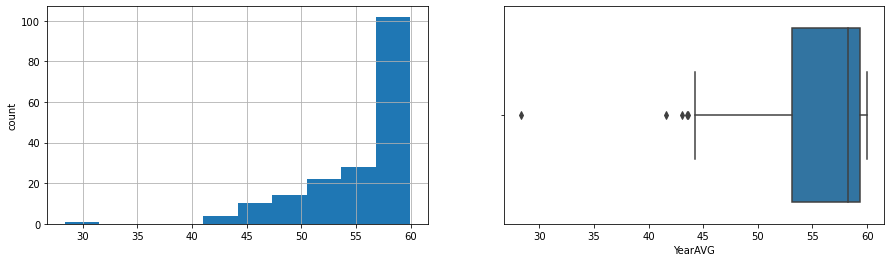

Y1
Skew : 0.21


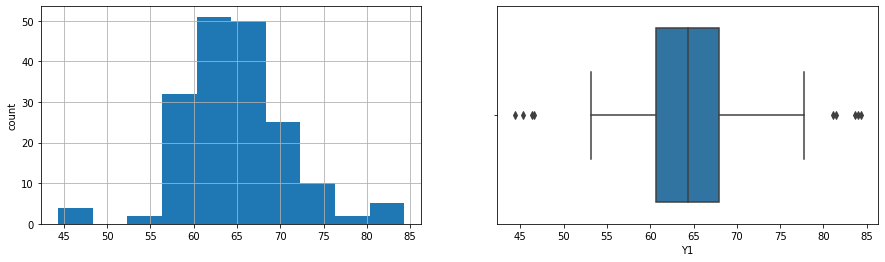

Y2
Skew : -0.36


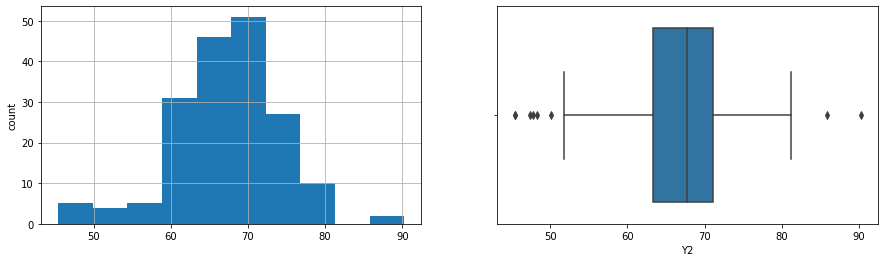

Y3
Skew : -0.82


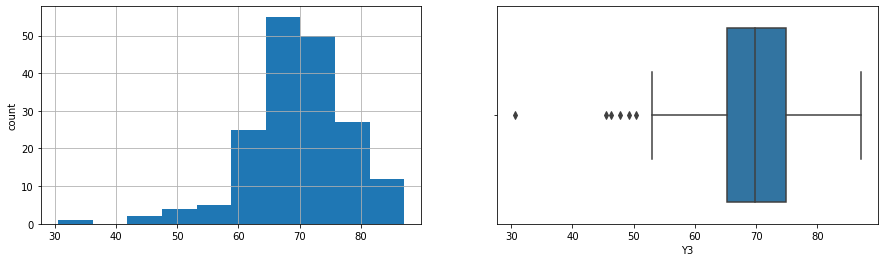

Y4
Skew : -0.55


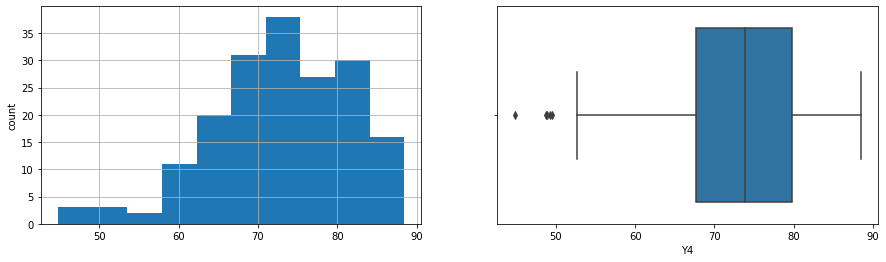

E1
Skew : -0.41


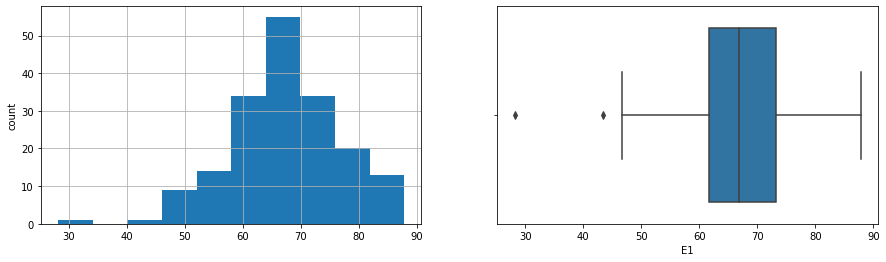

M1
Skew : -0.55


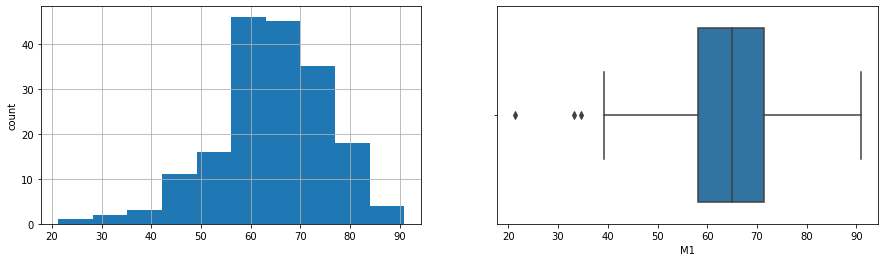

S1
Skew : -0.24


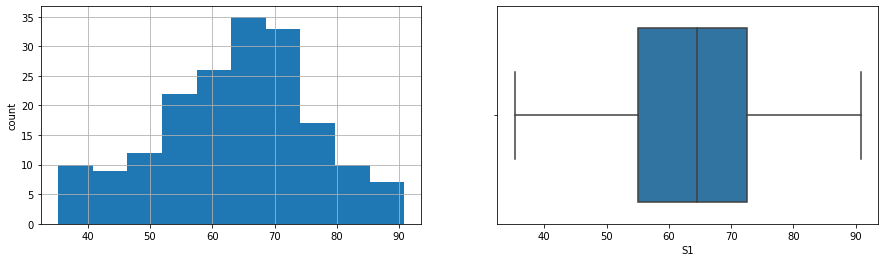

E2
Skew : -0.74


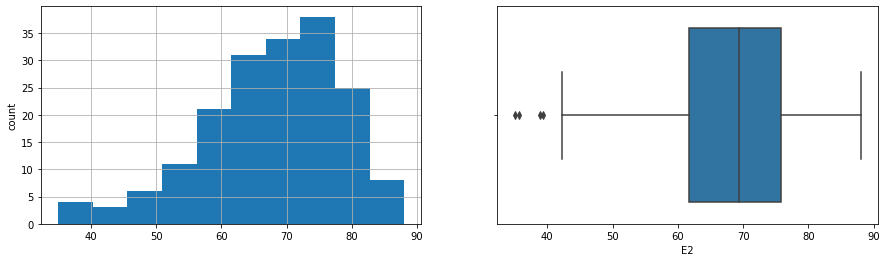

M2
Skew : -0.03


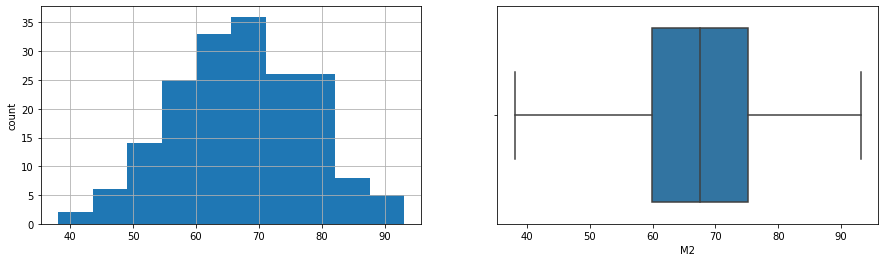

S2
Skew : -0.36


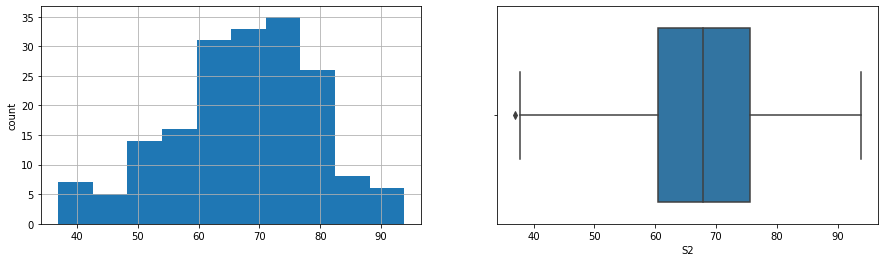

E3
Skew : -0.83


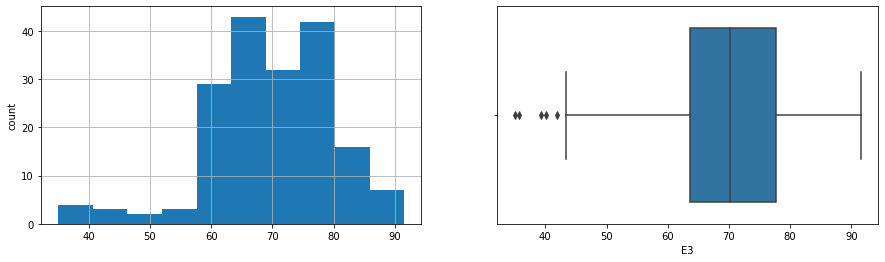

M3
Skew : -0.39


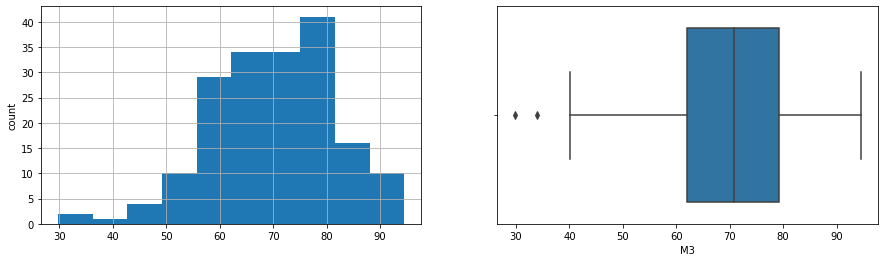

S3
Skew : -0.8


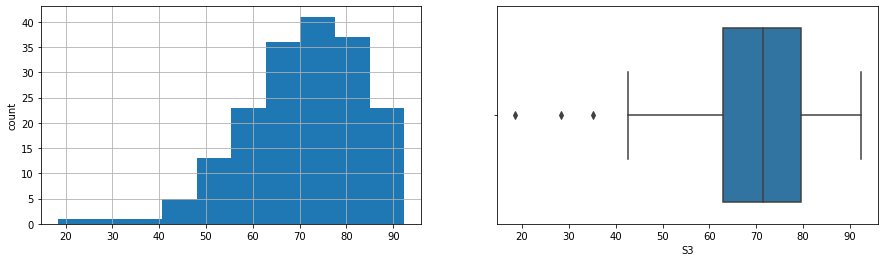

E4
Skew : -0.48


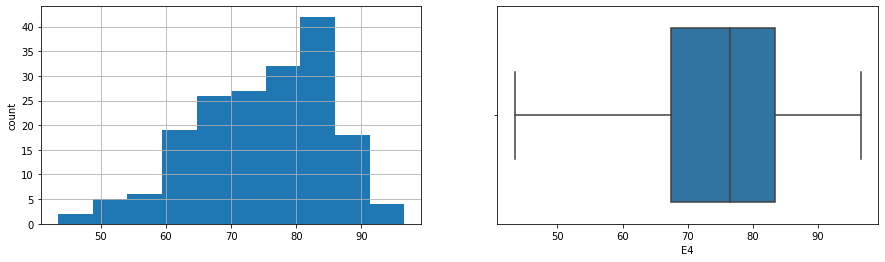

M4
Skew : -0.58


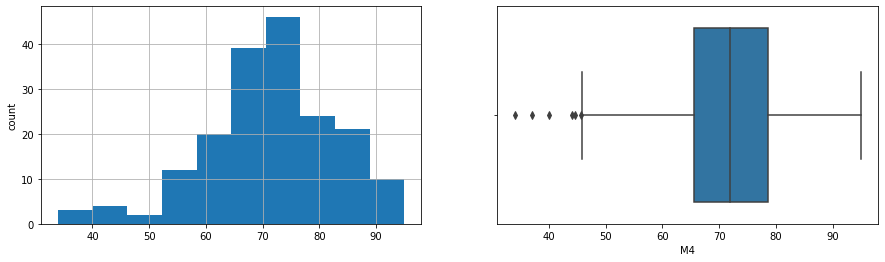

S4
Skew : -0.31


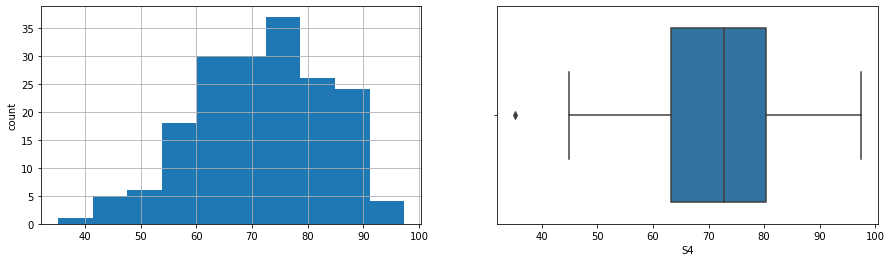

ET1
Skew : -0.7


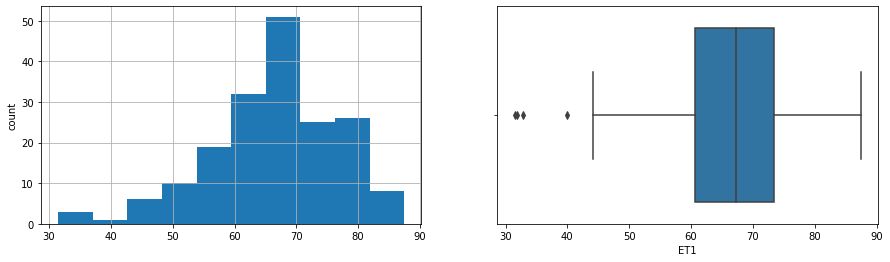

MT1
Skew : -1.0


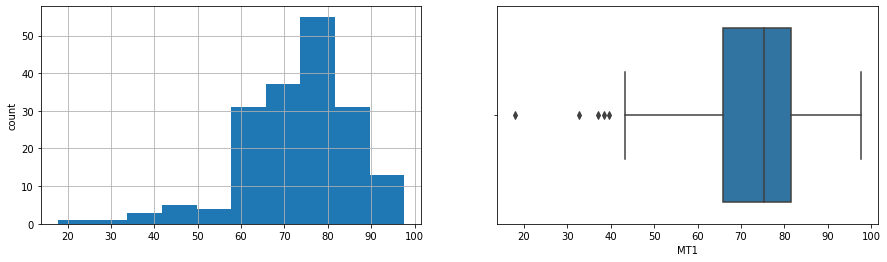

ST1
Skew : -0.47


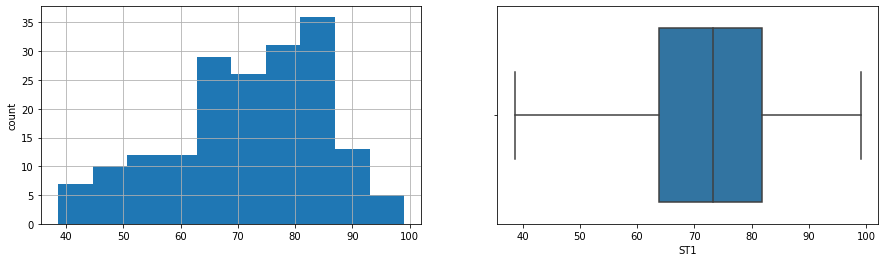

ET2
Skew : -0.84


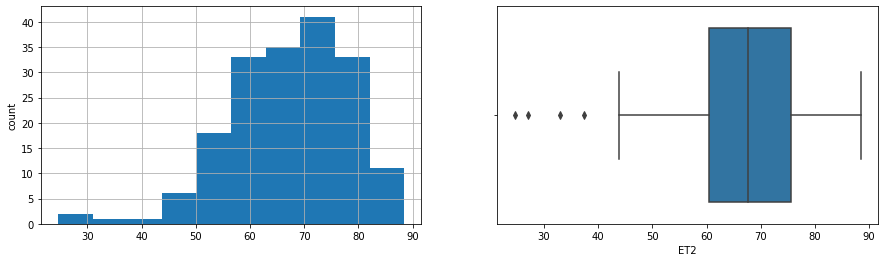

MT2
Skew : -0.36


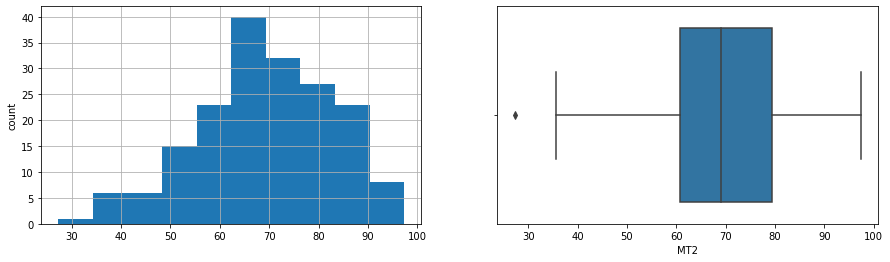

ST2
Skew : -0.25


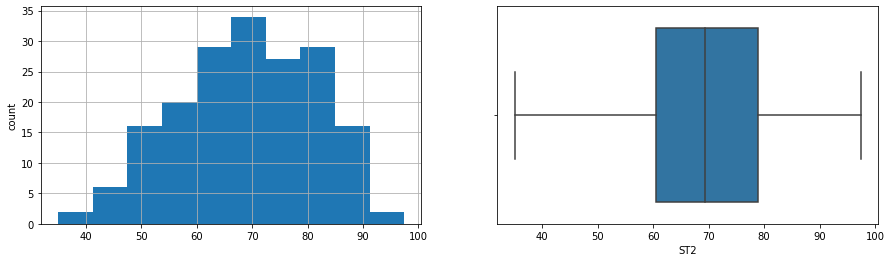

In [68]:
# Uncomment and complete the code by filling the blanks 
columnsToVisualize = [i for i in grades.columns if i not in ("Class" , "SKey","AY")]

for col in columnsToVisualize:
    print(col)
    print('Skew :',round(grades[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    grades[col].hist()
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(data = grades,hue='Class',x=col)
    plt.show()

the following will show the corrilation between the differnet columns

<AxesSubplot:>

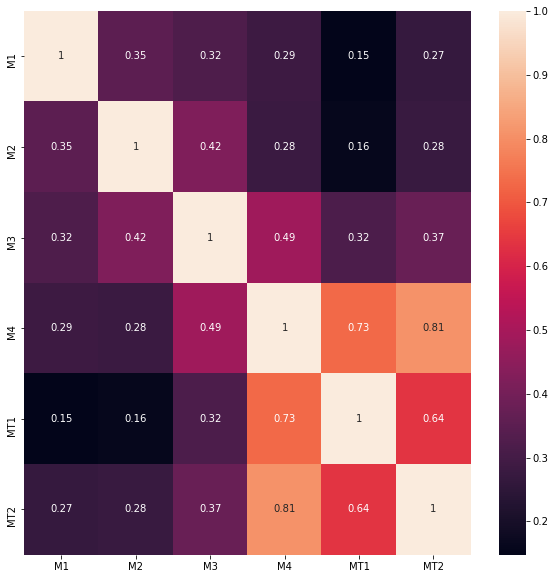

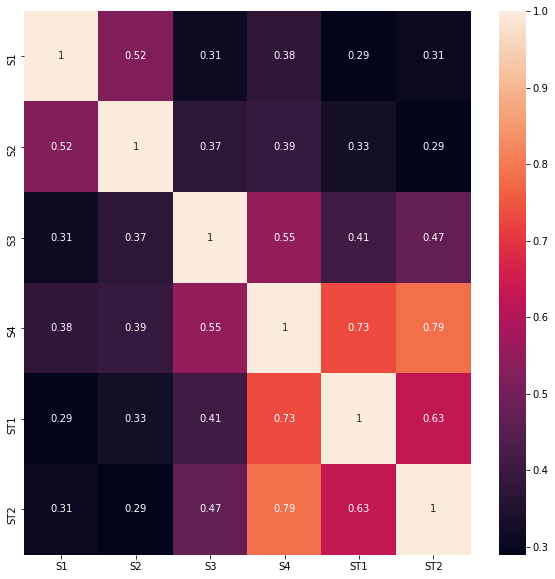

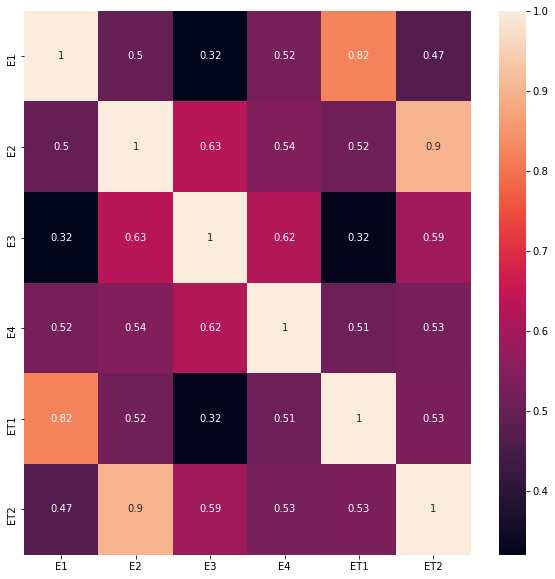

In [69]:
m_vals = ['M1','M2','M3','M4' , 'MT1' , 'MT2']
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(grades[m_vals].corr(),annot=True)

s_vals = ['S1','S2','S3','S4' , 'ST1' , 'ST2']
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(grades[s_vals].corr(),annot=True)

E_vals = ['E1','E2','E3','E4' , 'ET1' , 'ET2']
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(grades[E_vals].corr(),annot=True)

Class
Skew : -0.05


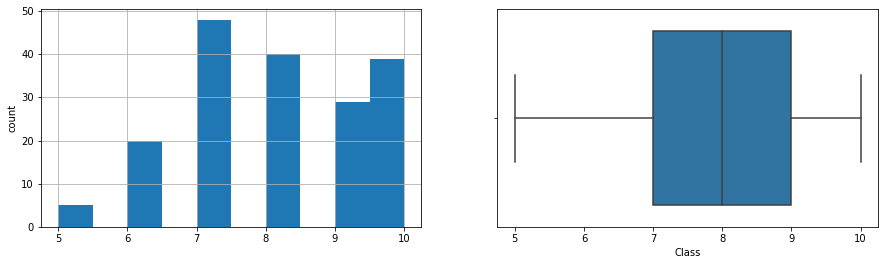

SKey
Skew : 1.71


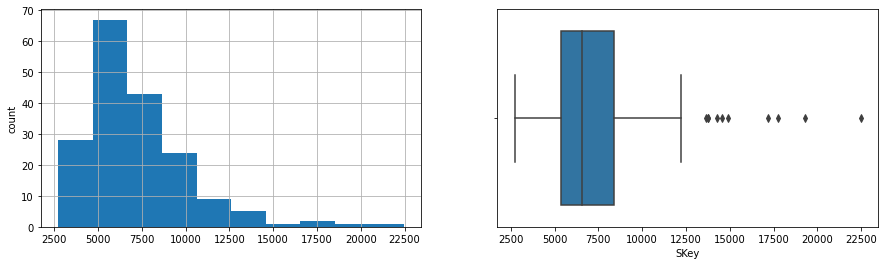

AY
Skew : 0.15


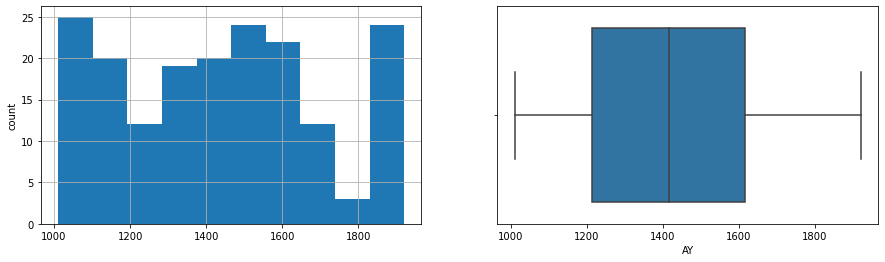

YearAVG
Skew : -1.72


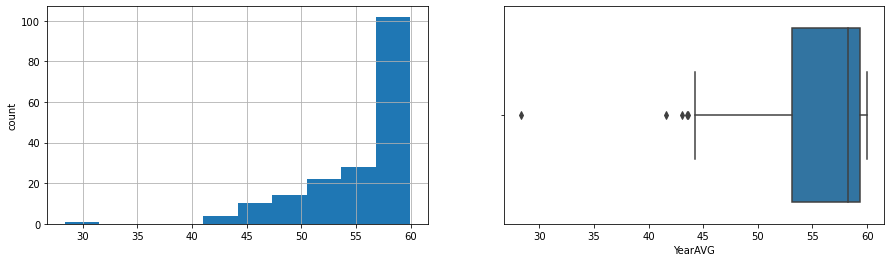

Y1
Skew : 0.21


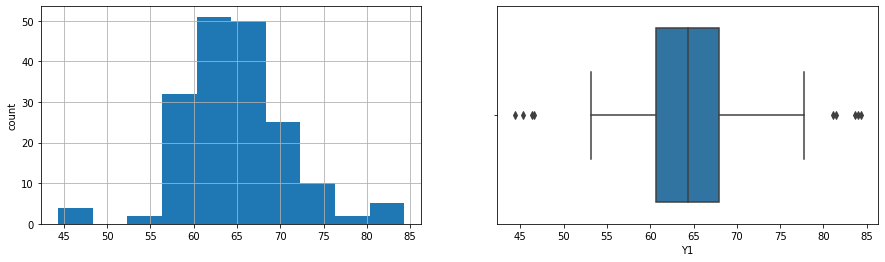

Y2
Skew : -0.36


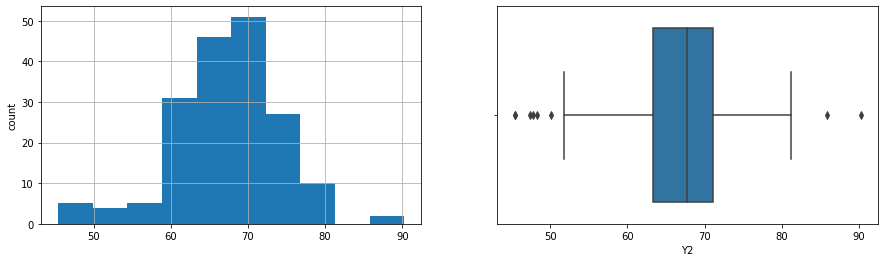

Y3
Skew : -0.82


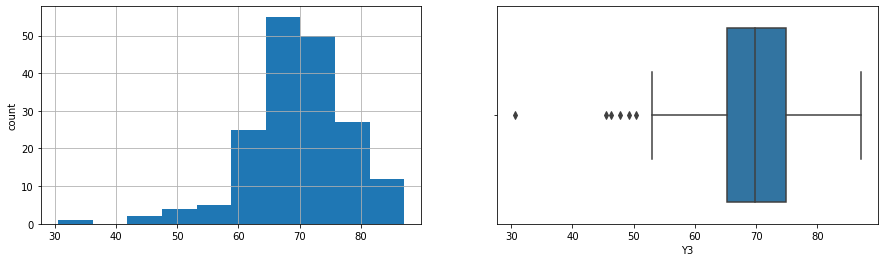

Y4
Skew : -0.55


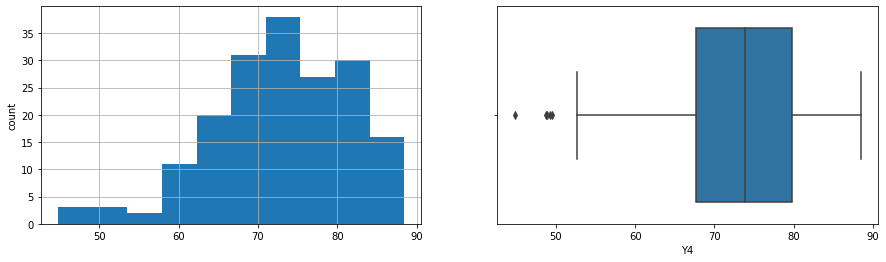

E1
Skew : -0.41


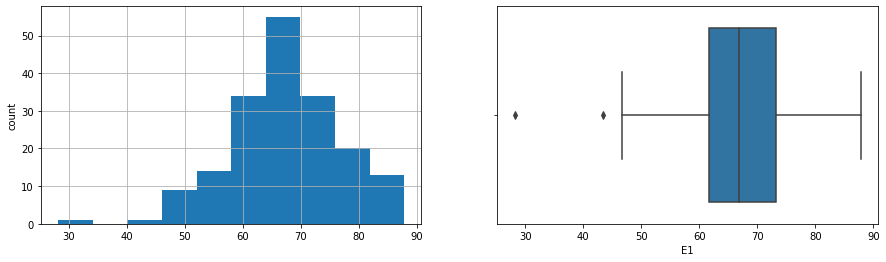

M1
Skew : -0.55


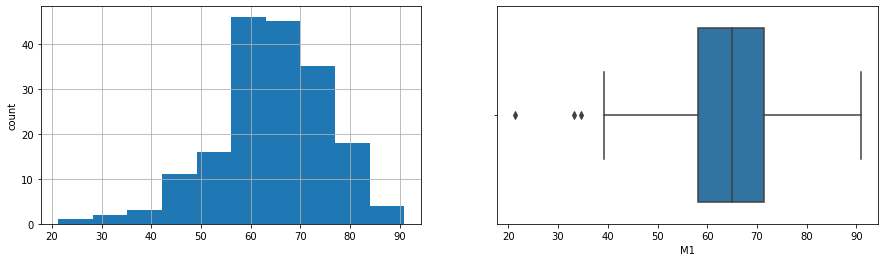

S1
Skew : -0.24


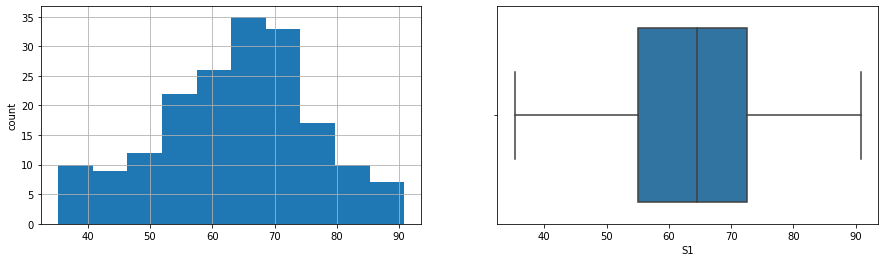

E2
Skew : -0.74


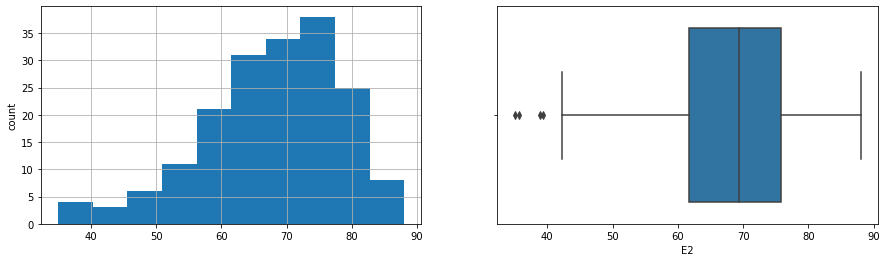

M2
Skew : -0.03


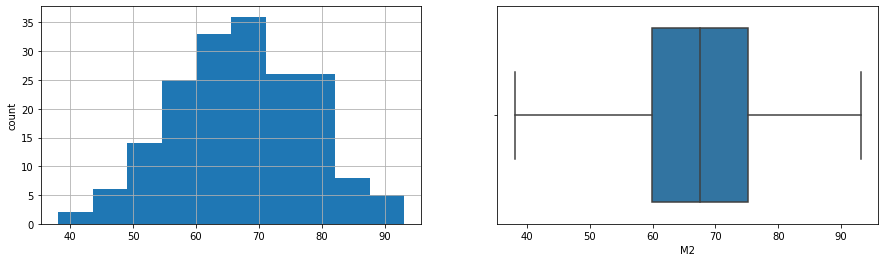

S2
Skew : -0.36


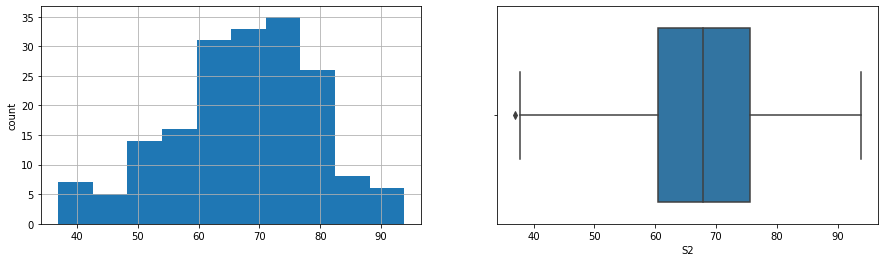

E3
Skew : -0.83


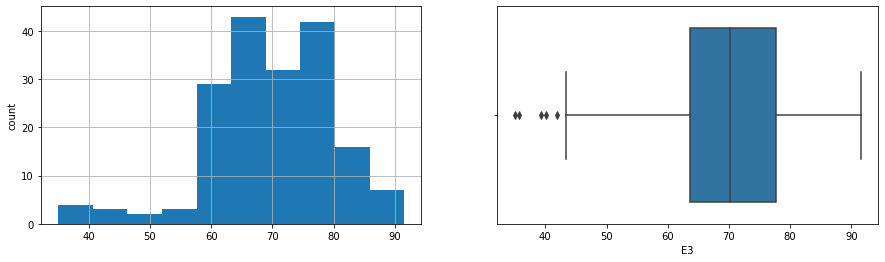

M3
Skew : -0.39


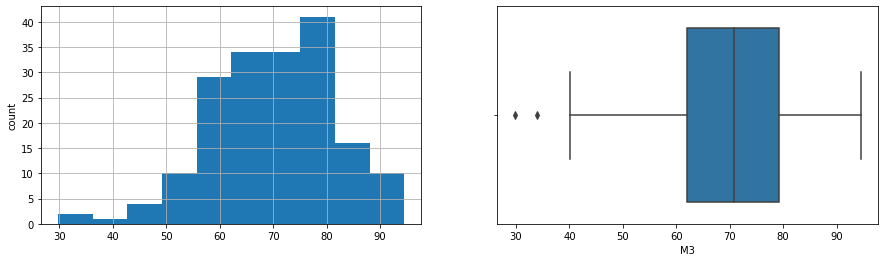

S3
Skew : -0.8


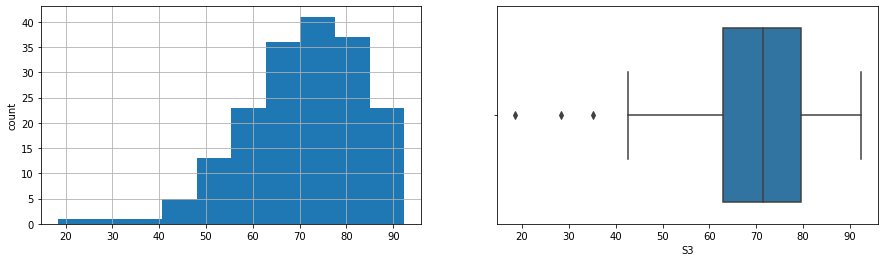

E4
Skew : -0.48


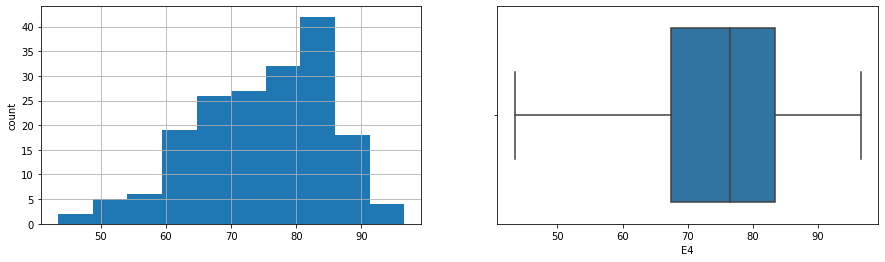

M4
Skew : -0.58


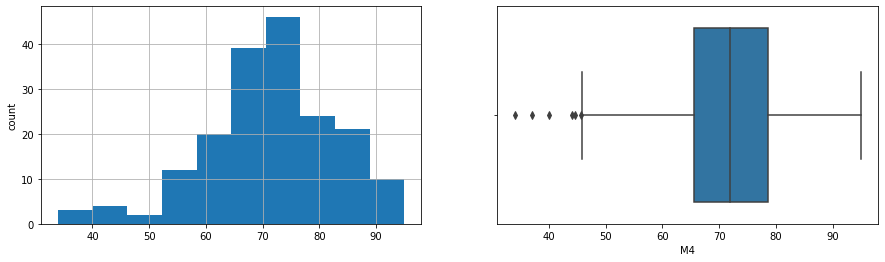

S4
Skew : -0.31


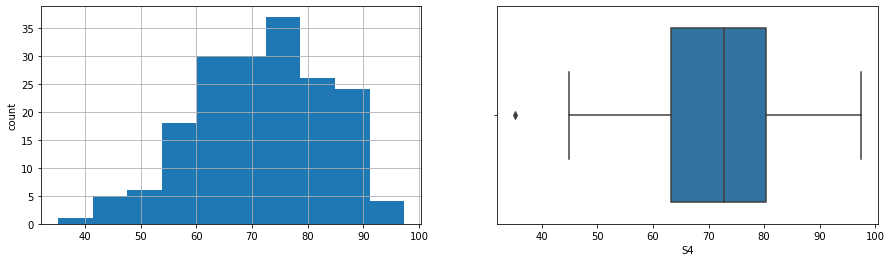

ET1
Skew : -0.7


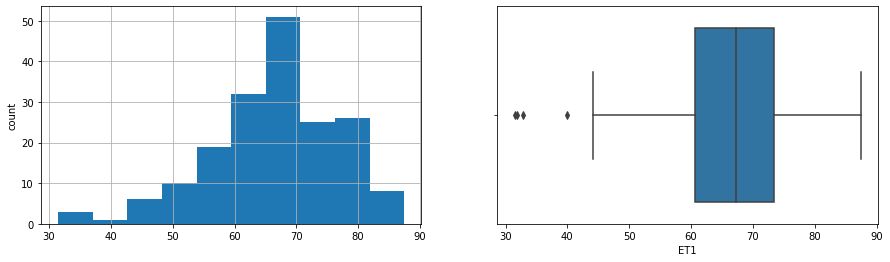

MT1
Skew : -1.0


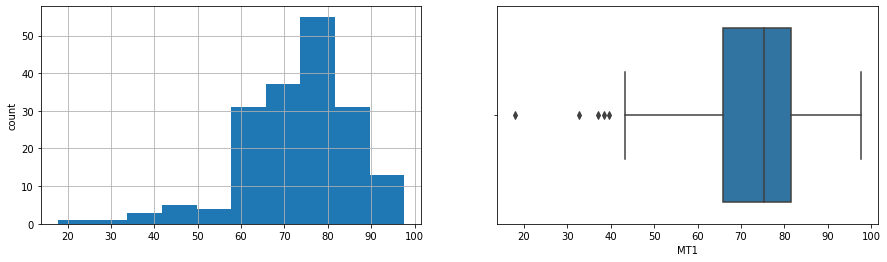

ST1
Skew : -0.47


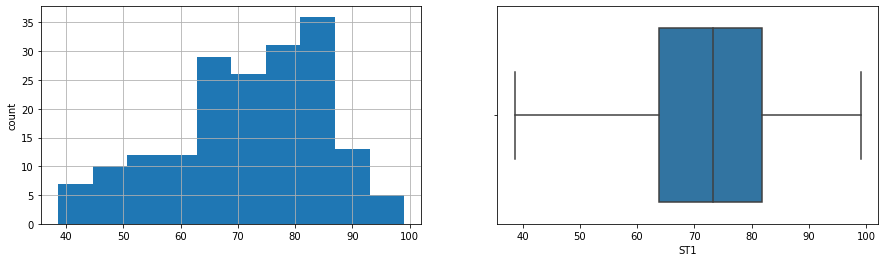

ET2
Skew : -0.84


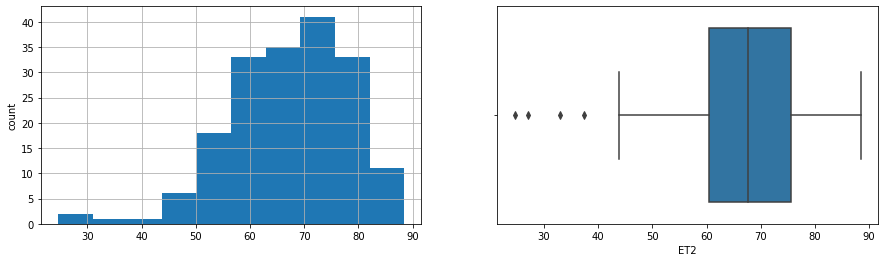

MT2
Skew : -0.36


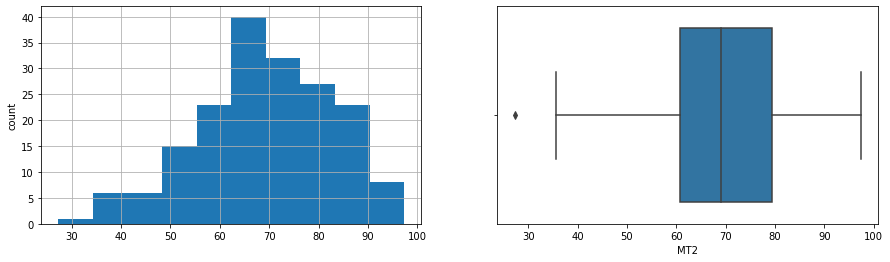

ST2
Skew : -0.25


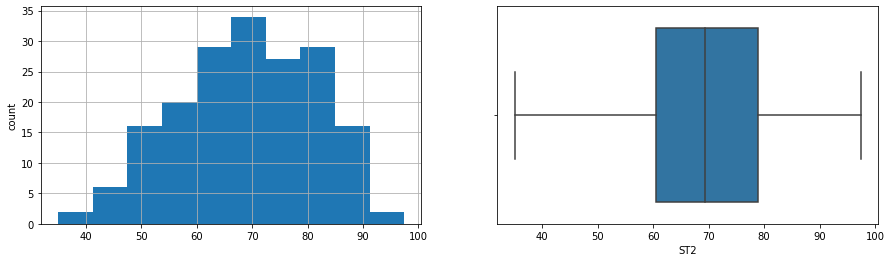

In [70]:
# Uncomment and complete the code by filling the blanks 
for col in grades.columns:
    print(col)
    print('Skew :',round(grades[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    grades[col].hist()
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(data = grades,x=col)
    plt.show()

results of most of the students are not normally distributed, very few failed students to learn from


In [71]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state = 0)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90, 22) (91, 22) (90,) (91,)


In [72]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [76]:
# Calculating the Coefficients
print('a1, a2 ... an for ', inputs , regressor.coef_)
# Calculating the Intercept
print('a0', regressor.intercept_)

a1, a2 ... an for  ['Y1', 'Y2', 'Y3', 'Y4', 'E1', 'M1', 'S1', 'E2', 'M2', 'S2', 'E3', 'M3', 'S3', 'E4', 'M4', 'S4', 'ET1', 'MT1', 'ST1', 'ET2', 'MT2', 'ST2'] [-0.07987172  0.09816414 -0.10865037  0.00813318 -0.00855308 -0.06830167
  0.14120556 -0.01817943  0.12396044 -0.09016548 -0.03281443  0.02881304
  0.00874722  0.0154715  -0.09466017  0.01618499  0.23211575  0.04319682
  0.00274993 -0.16712289  0.00158869  0.00039139]
a0 52.84076465948138


R Score:  -0.39024130698915904


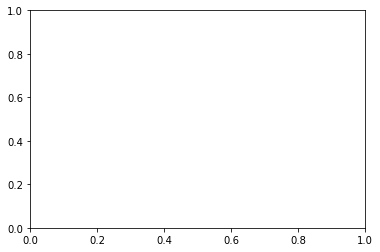

38.46190023618382

In [77]:
# Calculating the R squared value (this is the prediction quality)
from sklearn.metrics import r2_score , mean_squared_error
print('R Score: ' ,r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
fig1, ax1 = plt.subplots()
#ax1.pie([r2 , 1-r2], explode=(0.1,0), labels=['Correct predictions' , 'Wrong Predictions'], autopct='%1.1f%%',         shadow=True, startangle=90)
plt.show()
mean_squared_error(y_test, y_pred)

R-Squared epresents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.
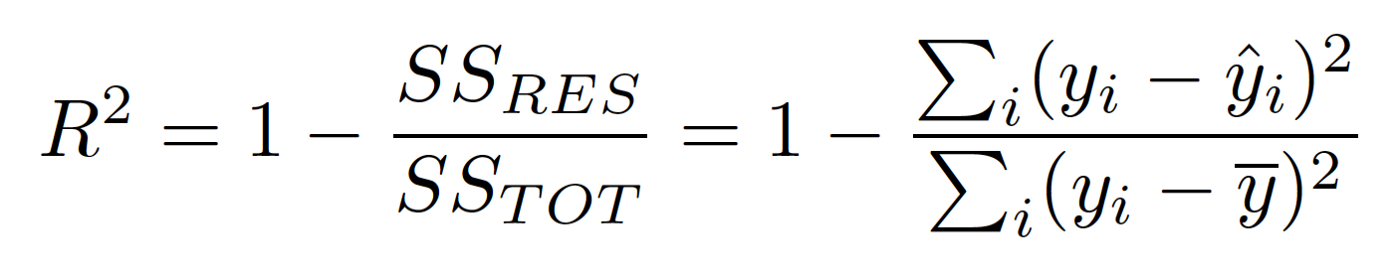

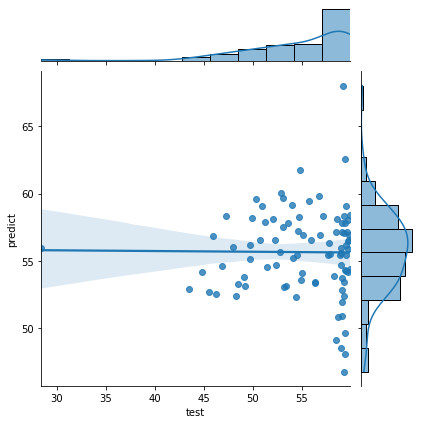

In [78]:
y_test1 = pd.DataFrame(y_test)
y_pred1 = pd.DataFrame(y_pred)
y_both = pd.concat([y_test1,y_pred1],axis=1)
y_both.columns = ['test','predict']
sns.jointplot(x=y_both['test'], y=y_both['predict'], data=y_both, kind='reg')

Most of the grades tested are above 60, which means there is only some learning happeneing about those who failed

In [79]:
#Trying another module
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import numpy as np
target= grades['YearAVG'].values
features= grades[inputs].values
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
features = sm.add_constant(features)
ols_model_0 = sm.OLS(target,features)
ols_res_0 = ols_model_0.fit()
print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.9589
Date:                Wed, 08 Sep 2021   Prob (F-statistic):              0.519
Time:                        22:15:21   Log-Likelihood:                -537.14
No. Observations:                 181   AIC:                             1120.
Df Residuals:                     158   BIC:                             1194.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.3715      3.664     14.566      0.0